# Data Wrangling to Capstone Project 1

## Overview

This document will go through the steps from importing, cleaning and exporting to a the data from [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) to a more accessable format for future reuse.

## Data at a Glance

The data from [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) include 3 years operating data, each year contains 4 data sets – station, status, trip and weather. Each data sets is in a .csv format. 

## Import data

The size of total data is 3.75 GB. It will definitely take a while to import the data to Pandas DataFrame objects. Moreover, since we need to transfer the data type of time information into Pandas-timedate datatype, the tranformation will also take large amount of time. Therefore, it makes sense if we can transform the data when we first import, since pandas provides function(infer_datetime_format) to transfer the data into datetime format when first importing a .csv file in a speed 5x~10x faster than transfer in DataFrame format. 

In [1]:
import pandas as pd
from itertools import *

In [2]:
# Import data of Year 1
stations1_1 = pd.read_csv(
    'data_raw/babs_open_data_year_1/201402_babs_open_data/201402_station_data.csv',
    parse_dates = ['installation'], infer_datetime_format = True)
status1_1 = pd.read_csv(
    'data_raw/babs_open_data_year_1/201402_babs_open_data/201402_status_data.csv', 
    parse_dates = ['time'], infer_datetime_format = True)
trips1_1 = pd.read_csv(
    'data_raw/babs_open_data_year_1/201402_babs_open_data/201402_trip_data.csv', 
    parse_dates = ['Start Date', 'End Date'], infer_datetime_format = True)
weathers1_1 = pd.read_csv(
    'data_raw/babs_open_data_year_1/201402_babs_open_data/201402_weather_data.csv',
    parse_dates = ['Date'], infer_datetime_format = True)

stations1_2 = pd.read_csv(
    'data_raw/babs_open_data_year_1/201408_babs_open_data/201408_station_data.csv',
    parse_dates = ['installation'], infer_datetime_format = True)
status1_2 = pd.read_csv(
    'data_raw/babs_open_data_year_1/201408_babs_open_data/201408_status_data.csv', 
    parse_dates = ['time'], infer_datetime_format = True)
trips1_2 = pd.read_csv(
    'data_raw/babs_open_data_year_1/201408_babs_open_data/201408_trip_data.csv', 
    parse_dates = ['Start Date', 'End Date'], infer_datetime_format = True)
weathers1_2 = pd.read_csv(
    'data_raw/babs_open_data_year_1/201408_babs_open_data/201408_weather_data.csv',
    parse_dates = ['PDT'], infer_datetime_format = True)

# Import data of Year 2
stations2 = pd.read_csv('data_raw/babs_open_data_year_2/201508_station_data.csv',
                        parse_dates = ['installation'], infer_datetime_format = True)
status2 = pd.read_csv('data_raw/babs_open_data_year_2/201508_status_data.csv', 
                      parse_dates = ['time'], infer_datetime_format = True)
trips2 = pd.read_csv('data_raw/babs_open_data_year_2/201508_trip_data.csv',
                     parse_dates = ['Start Date', 'End Date'], infer_datetime_format = True)
weathers2 = pd.read_csv('data_raw/babs_open_data_year_2/201508_weather_data.csv',
                        parse_dates = ['PDT'], infer_datetime_format = True)

# Import data of Year 3
stations3 = pd.read_csv('data_raw/babs_open_data_year_3/201608_station_data.csv',
                        parse_dates = ['installation'], infer_datetime_format = True)
status3 = pd.read_csv('data_raw/babs_open_data_year_3/201608_status_data.csv', 
                      parse_dates = ['time'], infer_datetime_format = True)
trips3 = pd.read_csv('data_raw/babs_open_data_year_3/201608_trip_data.csv', 
                     parse_dates = ['Start Date', 'End Date'], infer_datetime_format = True)
weathers3 = pd.read_csv('data_raw/babs_open_data_year_3/201608_weather_data.csv',
                        parse_dates = ['PDT'], infer_datetime_format = True)

## Combining Data

In this step, we'll combine the data from 3 years into 1 set of data.

### Unify the column names across data sets
Since each data sets in different year has different name convention, we need to examine and compare the column names of data sets with same data structure across different year. We'll then unify the column name when we make sure the data structure and columns are the same in different data sets.

In [3]:
# Unify the column name across data sets
## Compare the columns' length of each data sets
stationsAgg = [stations1_1, stations1_2, stations2, stations3]
statusAgg = [status1_1, status1_2, status2, status3]
tripsAgg = [trips1_1, trips1_2, trips2, trips3]
weathersAgg = [weathers1_1, weathers1_2, weathers2, weathers3]

def compareLen(agg):
    length = []
    for a in agg:
        length.append(len(list(a)))
    if max(length) == min(length):
        return True
    else:
        return False

def compareContent(agg):
    result = True
    l = []
    for i, a in enumerate(reversed(agg)):
        for s1, s2 in zip(a, agg[i-1]):
            if s1.strip().lower() != s2.strip().lower():
                result = False
                l.append([s1,s2])
    return result, l
        
compareContent(weathersAgg)  
print('Check column names for stations:')
print('length: ', compareLen(stationsAgg))
print('content: ', compareContent(stationsAgg))

print('Check column names for status:')
print('length: ', compareLen(statusAgg))
print('content: ', compareContent(statusAgg))

print('Check column names for trips:')
print('length: ', compareLen(tripsAgg))
print('content: ', compareContent(tripsAgg))

print('Check column names for weathers:')
print('length: ', compareLen(weathersAgg))
print('content: ', compareContent(weathersAgg))


Check column names for stations:
length:  True
content:  (True, [])
Check column names for status:
length:  True
content:  (True, [])
Check column names for trips:
length:  True
content:  (False, [['Subscriber Type', 'Subscription Type'], ['Subscription Type', 'Subscriber Type']])
Check column names for weathers:
length:  True
content:  (False, [['PDT', 'Date'], ['Max TemperatureF', 'Max_Temperature_F'], ['Mean TemperatureF', 'Mean_Temperature_F'], ['Min TemperatureF', 'Min_TemperatureF'], ['Max Dew PointF', 'Max_Dew_Point_F'], ['MeanDew PointF', 'MeanDew_Point_F'], ['Min DewpointF', 'Min_Dewpoint_F'], ['Max Humidity', 'Max_Humidity'], [' Mean Humidity', 'Mean_Humidity '], [' Min Humidity', 'Min_Humidity '], [' Max Sea Level PressureIn', 'Max_Sea_Level_Pressure_In '], [' Mean Sea Level PressureIn', 'Mean_Sea_Level_Pressure_In '], [' Min Sea Level PressureIn', 'Min_Sea_Level_Pressure_In '], [' Max VisibilityMiles', 'Max_Visibility_Miles '], [' Mean VisibilityMiles', 'Mean_Visibility_Mil

By carefully examining the results above, we can conclude that the columns in different data sets are curated in the same order but with slightly different naming convention. Therefore, we can set up an unified column names and assign to data sets in the different years.

In [4]:
# Make the lists contain the names of every columns in each data sets
stationsCol = list(stations1_1)
statusCol = list(status1_1)
tripsCol = list(trips1_1)
weathersCol = list(weathers3)

# This function eliminates the spaces in the name of columns
def unifyName(namelist):
    newName = []
    for n in namelist:
        newName.append(n.replace(" ",""))
    return newName

# Create an unified name across data sets
stationsCol = unifyName(stationsCol)
statusCol = unifyName(statusCol)
tripsCol = unifyName(tripsCol)
weathersCol = unifyName(weathersCol)

# This function re-assign new column names to an aggregated data sets with the same column structure
def changeColName(Agg, newName):
    for a in Agg:
        a.columns = newName

# Assign new names to every data sets
changeColName(stationsAgg, stationsCol)
changeColName(statusAgg, statusCol)
changeColName(tripsAgg, tripsCol)
changeColName(weathersAgg, weathersCol)

In [5]:
# Re-check if the names of columns are unified across data sets

print('Check column names for stations:')
print('length: ', compareLen(stationsAgg))
print('content: ', compareContent(stationsAgg))

print('Check column names for status:')
print('length: ', compareLen(statusAgg))
print('content: ', compareContent(statusAgg))

print('Check column names for trips:')
print('length: ', compareLen(tripsAgg))
print('content: ', compareContent(tripsAgg))

print('Check column names for weathers:')
print('length: ', compareLen(weathersAgg))
print('content: ', compareContent(weathersAgg))

Check column names for stations:
length:  True
content:  (True, [])
Check column names for status:
length:  True
content:  (True, [])
Check column names for trips:
length:  True
content:  (True, [])
Check column names for weathers:
length:  True
content:  (True, [])


The column names are now unified, we can now combine the data sets of different years into one piece.
### Combine Data
We'll use pd.DataFrame.append() method to join 4 data sets into one.

In [6]:
# Combine data from 3 years into one data set
stations = pd.concat(stationsAgg, join = 'inner', copy = False)
stations = stations.drop_duplicates(subset=['name', 'dockcount', 'installation'])

status = pd.concat(statusAgg)
status = status.drop_duplicates()

trips = pd.concat(tripsAgg)
trips = trips.drop_duplicates()

weathers = pd.concat(weathersAgg)
weathers = weathers.drop_duplicates()


In [7]:
del stationsAgg, stations1_1, stations1_2, stations2, stations3
del statusAgg, status1_1, status1_2, status2, status3
del tripsAgg, trips1_1, trips1_2, trips2, trips3
del weathersAgg, weathers1_1, weathers1_2, weathers2, weathers3 

## Clean Data

Now we can clean up the data. There will be 2 steps in this stage:
1. Eliminate the data if all columns or rows are Nan.
2. Filling data with Nan value by mean, max or 5 day average.

In [8]:
# eliminate data if all columns or rows are Nan
stations = stations.dropna(how = 'all')
print('Check stations:')
print(stations.isnull().any())
print('=============================\n')

status = status.dropna(how = 'all')
print('Check status:')
print(status.isnull().any())
print('=============================\n')

trips = trips.dropna(how = 'all')
print('Check trips:')
print(trips.isnull().any())
print('=============================\n')

weathers = weathers.dropna(how = 'all')
print('Check weathers:')
print(weathers.isnull().any())
print('=============================\n')

Check stations:
station_id      False
name            False
lat             False
long            False
dockcount       False
landmark        False
installation    False
dtype: bool

Check status:
station_id         False
bikes_available    False
docks_available    False
time               False
dtype: bool

Check trips:
TripID              False
Duration            False
StartDate           False
StartStation        False
StartTerminal       False
EndDate             False
EndStation          False
EndTerminal         False
Bike#               False
SubscriptionType    False
ZipCode              True
dtype: bool

Check weathers:
PDT                       False
MaxTemperatureF            True
MeanTemperatureF           True
MinTemperatureF            True
MaxDewPointF               True
MeanDewPointF              True
MinDewpointF               True
MaxHumidity                True
MeanHumidity               True
MinHumidity                True
MaxSeaLevelPressureIn      True
MeanSeaLev

As we can see, there are still some 'Nan' values in trips and weathers. We need to take a close look to decide how we can fill out those Nan number. However, the ZipCode in trips dataframe is actaully the ZipCode of a customer or subscriber. It makes sense if we just leave it alone. However, just for future analysis per se, I will fill the NaN value of ZipCode into 00000. 

In [9]:
# Fill Nan value under ZipCode to 00000
trips = trips.fillna('00000')
trips.isnull().any()

TripID              False
Duration            False
StartDate           False
StartStation        False
StartTerminal       False
EndDate             False
EndStation          False
EndTerminal         False
Bike#               False
SubscriptionType    False
ZipCode             False
dtype: bool

### Clean up data in weathers
Now we need to take care the NaN data of weathers.

In [10]:
weathers.dtypes

PDT                       datetime64[ns]
MaxTemperatureF                  float64
MeanTemperatureF                 float64
MinTemperatureF                  float64
MaxDewPointF                     float64
MeanDewPointF                    float64
MinDewpointF                     float64
MaxHumidity                      float64
MeanHumidity                     float64
MinHumidity                      float64
MaxSeaLevelPressureIn            float64
MeanSeaLevelPressureIn           float64
MinSeaLevelPressureIn            float64
MaxVisibilityMiles               float64
MeanVisibilityMiles              float64
MinVisibilityMiles               float64
MaxWindSpeedMPH                  float64
MeanWindSpeedMPH                 float64
MaxGustSpeedMPH                  float64
PrecipitationIn                   object
CloudCover                       float64
Events                            object
WindDirDegrees                   float64
ZIP                                int64
dtype: object

It seems that except 'PrecipitationIn', 'Events' contain string object, the rest are numeric data. We can use forward fill for the numeric data. Meanwhile, we'll need to take a look at 'PrecipitationIn' and 'Events' to determine how we can fill in logical data.

In [11]:
weathers[weathers.MeanTemperatureF.isnull()]

,PDT,MaxTemperatureF,MeanTemperatureF,MinTemperatureF,MaxDewPointF,MeanDewPointF,MinDewpointF,MaxHumidity,MeanHumidity,MinHumidity,...,MeanVisibilityMiles,MinVisibilityMiles,MaxWindSpeedMPH,MeanWindSpeedMPH,MaxGustSpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,ZIP
1071,2015-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94301
1337,2015-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,10.0,16.0,6.0,22.0,0,0.0,NaN,340.0,94041
1338,2015-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,9.0,14.0,7.0,18.0,0,3.0,NaN,356.0,94041
1339,2015-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,10.0,17.0,7.0,NaN,0,2.0,NaN,23.0,94041


There are three ways to fill the NaN of weathers:
* Interpolate/extrapolate the data
* Use average data from other close-by area/ZIP code (The data contains weather informations from 5 different area, we can assume some parameters are similar across different area)
* Use five-day average to fill the data

To identify which method is the best choice, I would like to compare the each information by area:

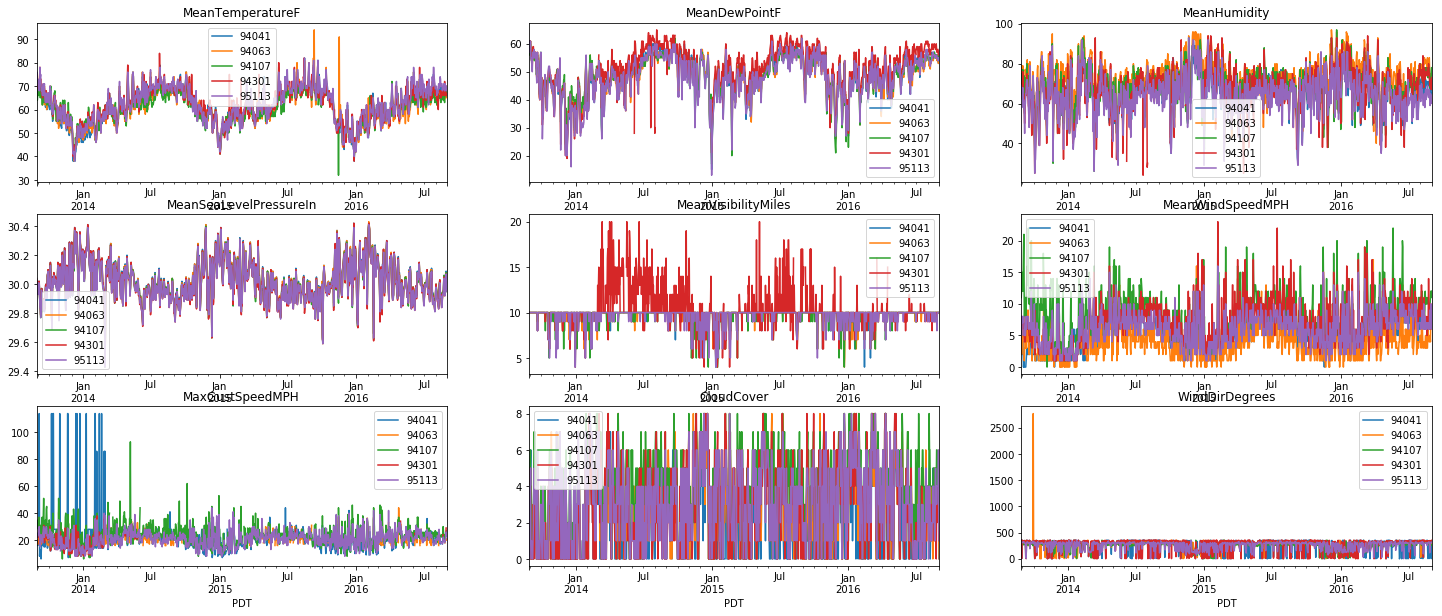

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
weathers = weathers.sort_values(by=['ZIP','PDT'])
w = weathers
L = w.ZIP.unique()
C = ['MeanTemperatureF','MeanDewPointF','MeanHumidity',
     'MeanSeaLevelPressureIn','MeanVisibilityMiles','MeanWindSpeedMPH','MaxGustSpeedMPH','CloudCover','WindDirDegrees']

fig, axes =plt.subplots(3, 3, figsize=(25,10))

for i,ax in enumerate(axes):
    for j,x in enumerate(ax):
        x.set_title(C[i*3+j])
        for l in L:
            p = w[w.ZIP == l]
            p.plot(x = 'PDT', y = C[i*3+j], ax = x, label = l )
            #plt.plot(p.PDT, p['MeanTemperatureF'], label = l, x)
plt.legend()

We can see that Temperature, SeaLevel Pressure, Dew Point, Humidty and Cloud Cover all have similar value across different ZIP code area. We can therefore use the mean of the near-by area to fill the missing data. As for the Visibility and Wind Speed, it seems that the variences of those parameters are quite large. Therefore, I would interpolate the data to have the best result.

In [13]:
# list out the columns that we wish to fill the NaN value
param = list(weathers)[1:13]
param.append(list(weathers)[20])

# Loop through each columns
for par in param:
    # get the location of NaN value
    loc = weathers[weathers[par].isnull()][['PDT','ZIP']]
        # Fill each NaN location with the mean value of other area in the same day
    for p,z in zip(loc.PDT, loc.ZIP):
        weathers.loc[(weathers.PDT == p) & (weathers.ZIP == z), par] = weathers[weathers.PDT == p][par].mean()

w.isnull().any()

PDT                       False
MaxTemperatureF           False
MeanTemperatureF          False
MinTemperatureF           False
MaxDewPointF              False
MeanDewPointF             False
MinDewpointF              False
MaxHumidity               False
MeanHumidity              False
MinHumidity               False
MaxSeaLevelPressureIn     False
MeanSeaLevelPressureIn    False
MinSeaLevelPressureIn     False
MaxVisibilityMiles         True
MeanVisibilityMiles        True
MinVisibilityMiles         True
MaxWindSpeedMPH            True
MeanWindSpeedMPH           True
MaxGustSpeedMPH            True
PrecipitationIn            True
CloudCover                False
Events                     True
WindDirDegrees             True
ZIP                       False
dtype: bool

In [14]:
# Take care the illogic outlier from Wind Dir Degrees
weathers.loc[:,'WindDirDegrees'] = weathers.WindDirDegrees%360

In [15]:
# Fill Visibility, WindSpeed, WindDirDegrees by interpoloating the data
param = list(weathers)[13:19]
param.append(list(weathers)[22])

for par in param:
    loc = weathers[weathers[par].isnull()].ZIP.unique()
    for l in loc:
        weathers.loc[weathers.ZIP == l, par] = weathers[weathers.ZIP == l][par].interpolate()
        
weathers.isnull().any()

PDT                       False
MaxTemperatureF           False
MeanTemperatureF          False
MinTemperatureF           False
MaxDewPointF              False
MeanDewPointF             False
MinDewpointF              False
MaxHumidity               False
MeanHumidity              False
MinHumidity               False
MaxSeaLevelPressureIn     False
MeanSeaLevelPressureIn    False
MinSeaLevelPressureIn     False
MaxVisibilityMiles        False
MeanVisibilityMiles       False
MinVisibilityMiles        False
MaxWindSpeedMPH           False
MeanWindSpeedMPH          False
MaxGustSpeedMPH           False
PrecipitationIn            True
CloudCover                False
Events                     True
WindDirDegrees            False
ZIP                       False
dtype: bool

In [16]:
# Fill 0 to Nan and T for PrecipitationIn
weathers.loc[:,'PrecipitationIn'] = weathers.PrecipitationIn.fillna('0')
weathers.loc[:,'PrecipitationIn'] = weathers.PrecipitationIn.replace('T','0')
weathers.loc[:,'PrecipitationIn'] = pd.to_numeric(weathers.PrecipitationIn)

# Fill Nan with None for Events
weathers.loc[:,'Events'] = weathers.Events.fillna('None')

weathers.isnull().any()

PDT                       False
MaxTemperatureF           False
MeanTemperatureF          False
MinTemperatureF           False
MaxDewPointF              False
MeanDewPointF             False
MinDewpointF              False
MaxHumidity               False
MeanHumidity              False
MinHumidity               False
MaxSeaLevelPressureIn     False
MeanSeaLevelPressureIn    False
MinSeaLevelPressureIn     False
MaxVisibilityMiles        False
MeanVisibilityMiles       False
MinVisibilityMiles        False
MaxWindSpeedMPH           False
MeanWindSpeedMPH          False
MaxGustSpeedMPH           False
PrecipitationIn           False
CloudCover                False
Events                    False
WindDirDegrees            False
ZIP                       False
dtype: bool

## Compress and Divide Status DataFrame 
Status has over 100 million entry, conuming a lot memory and time to process. Luckily, it is possible to compress it by eliminate duplicated data.

In [17]:
# eliminate the duplicated and adjacent row
status = status.sort_values(by =['time', 'station_id'])
status = status.loc[(status.station_id.shift(1) != status.station_id)|
               (status.bikes_available.shift(1)!=status.bikes_available)|
               (status.docks_available.shift(1)!=status.docks_available)]

In [18]:
# divide status into three file since object over 4GB can not be pickled. See reference: http://bugs.python.org/issue24658
status1 = status.iloc[:len(status)//3,:]
status2 = status.iloc[len(status)//3:len(status)//3*2,:]
status3 = status.iloc[len(status)//3*2:,:]

## Export File
Finally, we need to export dataframe objects for future re-use. The pickle module provides a pretty good function to save the objects into string file.

In [19]:
import pickle

stationfile = open("data_cleaned/stations_all_data","wb")
tripfile = open("data_cleaned/trips_all_data","wb")
weatherfile = open("data_cleaned/weathers_all_data","wb")
statusfile1 = open("data_cleaned/status_all_data1","wb")
statusfile2 = open("data_cleaned/status_all_data2","wb")
statusfile3 = open("data_cleaned/status_all_data3","wb")
pickle.dump(stations, stationfile)
pickle.dump(trips, tripfile)
pickle.dump(weathers, weatherfile)
pickle.dump(status1, statusfile1, protocol=4)
pickle.dump(status2, statusfile2)
pickle.dump(status3, statusfile3)
stationfile.close()
tripfile.close()
weatherfile.close()
statusfile1.close()
statusfile2.close()
statusfile3.close()